In [3]:
import numpy as np
# 我们总是可以把一般的图的节点改成int类型，所有还是用列表保存每个beta的值
from hSIR import HyperSIRModel
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import networkx as nx
class HDA:
    def __init__(self, graph, beta, gamma):
        self.graph = graph
        self.beta = beta
        self.gamma = gamma
        self.n_nodes = nx.number_of_nodes(graph)
        self.model = HyperSIRModel(self.graph)

    def get_obsevation(self, round, Is, beta_cov = 0.00001, gamma_cov = 0.00001):
        # 生成beta的随机数
        beta_list = np.random.exponential(self.beta, self.n_nodes)
        gamma_list = np.random.exponential(self.gamma, self.n_nodes)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', beta_list)
        cfg.add_model_parameter('gamma', gamma_list)
        cfg.add_model_parameter("fraction_infected", Is) # 用模拟值做初始感染率
        self.model.set_initial_status(cfg)
        iterations = self.model.iteration_bunch(bunch_size=round)
        self.trends = self.model.build_trends(iterations)
        
        
    def generate_modes(N, graph, seed, Is, params, mode, beta_gt, gamma_gt):
        # 生成预测模型
        # params 里面有初始值
        # 这里取消了随机种子的设定
        # 还是用统一模型去估计
        sirmodels = []
        if mode == 'beta':
            betas = params #生成的模型的均值是真实值
            gammas = gamma_gt * np.ones(N)  # _gt代表真实值
        elif mode == 'gamma':  # 估计gamma
            betas = beta_gt * np.ones(N)
            gammas = params
        else:
            betas = params[0].reshape(-1)
            gammas = params[1].reshape(-1)
        for i in range(N):  # N是节点数目
            model = ep.SIRModel(graph)
            # model = ep.SIRModel(graph, seed=seed)
            # model = ep.SIRModel(graph)
            cfg = mc.Configuration()
            cfg.add_model_parameter('beta', betas[i])
            cfg.add_model_parameter('gamma', gammas[i])
            cfg.add_model_parameter("fraction_infected", Is[i]) # 用模拟值做初始感染率
            model.set_initial_status(cfg)
            sirmodels.append(model)
        return sirmodels

        
    
        
        
        

In [13]:
model.params['model']["beta"] = 1

In [14]:
model.params['model']["beta"]

1

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
# 读取网络
path = r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2\scen2_data\netwwork\p2p-Gnutella05.txt"
def read_txt_direct(data):
    g = nx.read_edgelist(data,  nodetype=int, create_using=nx.DiGraph())
    return g
g = read_txt_direct(path)

In [2]:
# 生成观测数据
from hSIR import HyperSIRModel
import numpy as np
import ndlib.models.ModelConfig as mc
import networkx as nx
from utils import save_obj, load_obj
from hda_main import run
# for beta in [0.002, 0.005, 0.01, 0.015]:
#     gamma = 0.002
#     round = 3000
#     Is = 0.002
#     n_nodes = nx.number_of_nodes(g)
#     model = HyperSIRModel(g)
#     beta_list = np.random.exponential(beta, n_nodes)
#     gamma_list = np.random.exponential(gamma, n_nodes)
#     cfg = mc.Configuration()
#     cfg.add_model_parameter('beta', beta_list)
#     cfg.add_model_parameter('gamma', gamma_list)
#     cfg.add_model_parameter("fraction_infected", Is) # 用模拟值做初始感染率
#     model.set_initial_status(cfg)
#     iterations = model.iteration_bunch(bunch_size=3000)
#     trends = model.build_trends(iterations)
#     save_obj(trends, './scen2_data/beta_{}trends'.format(beta))
#     gt_param = {'graph': g, 'Is':0.002, 'beta_gt':beta, 'gamma_gt':gamma, 'gts': trends, 'n_nodes':8846, 'save_dir':'./scen2_data/res/'}
#     run(gt_param = gt_param, beta=0.01, gamma=0.01, task='all', Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds = 3000, measurement_mode='both')

In [4]:
from hSIR import HyperSIRModel
import numpy as np
import ndlib.models.ModelConfig as mc
import networkx as nx
from utils import save_obj, load_obj
from hda_main import run
import networkx as nx
import matplotlib.pyplot as plt
# 读取网络
path = r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen2\scen2_data\netwwork\p2p-Gnutella05.txt"
def read_txt_direct(data):
    g = nx.read_edgelist(data,  nodetype=int, create_using=nx.DiGraph())
    return g
g = read_txt_direct(path)
for beta_t in [0.005, 0.01, 0.015, 0.02]:
    for gamma_t in [0.003, 0.006, 0.009, 0.012]:
        i = 0
        round = 3000
        Is = 0.002
        n_nodes = nx.number_of_nodes(g)
        model = HyperSIRModel(g)
        beta_list = np.random.exponential(beta_t, n_nodes)
        gamma_list = np.random.exponential(gamma_t, n_nodes)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', beta_list)
        cfg.add_model_parameter('gamma', gamma_list)
        cfg.add_model_parameter("fraction_infected", Is) # 用模拟值做初始感染率
        model.set_initial_status(cfg)
        iterations = model.iteration_bunch(bunch_size=3000)
        trends = model.build_trends(iterations)
        save_obj(trends, './scen2_data/beta_{}gamma_{}trends'.format(beta_t, gamma_t))
        gt_param = {'graph': g, 'Is':0.002, 'beta_gt':beta_t, 'gamma_gt':gamma_t, 'gts': trends, 'n_nodes':8846, 'save_dir':'./scen2_data/res/'}
        run(gt_param = gt_param, beta=0.01, gamma=0.01, task='all', Q_x = 1e-4, Q_param = 1e-4, P_x = 5e-4, P_param = 1e-2, R_x= 5e-3, N = 50, windows = 10, rounds = 3000, measurement_mode='both', name = 'beta_{}gamma_{}_num{}'.format(beta_t, gamma_t,i))


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.005gamma_0.003_num0


Test: 100%|██████████| 3000/3000 [32:17<00:00,  1.55it/s, gama_param=0.00284, param=0.0042] 


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.005gamma_0.006_num0


Test: 100%|██████████| 3000/3000 [26:11<00:00,  1.91it/s, gama_param=0.00512, param=0.00396]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.005gamma_0.009_num0


Test: 100%|██████████| 3000/3000 [22:43<00:00,  2.20it/s, gama_param=0.00636, param=0.0038] 


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.005gamma_0.012_num0


Test: 100%|██████████| 3000/3000 [22:36<00:00,  2.21it/s, gama_param=0.0137, param=0.00869]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.01gamma_0.003_num0


Test: 100%|██████████| 3000/3000 [33:43<00:00,  1.48it/s, gama_param=0.00253, param=0.00783]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.01gamma_0.006_num0


Test: 100%|██████████| 3000/3000 [29:19<00:00,  1.71it/s, gama_param=0.00491, param=0.0107]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.01gamma_0.009_num0


Test: 100%|██████████| 3000/3000 [26:36<00:00,  1.88it/s, gama_param=0.00858, param=0.0111]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.01gamma_0.012_num0


Test: 100%|██████████| 3000/3000 [24:49<00:00,  2.01it/s, gama_param=0.00971, param=0.00832]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.015gamma_0.003_num0


Test: 100%|██████████| 3000/3000 [35:15<00:00,  1.42it/s, gama_param=0.00234, param=0.00911]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.015gamma_0.006_num0


Test: 100%|██████████| 3000/3000 [29:37<00:00,  1.69it/s, gama_param=0.0042, param=0.0137] 


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.015gamma_0.009_num0


Test: 100%|██████████| 3000/3000 [27:35<00:00,  1.81it/s, gama_param=0.00515, param=0.0102]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.015gamma_0.012_num0


Test: 100%|██████████| 3000/3000 [26:19<00:00,  1.90it/s, gama_param=0.00743, param=0.0104]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.02gamma_0.003_num0


Test: 100%|██████████| 3000/3000 [34:42<00:00,  1.44it/s, gama_param=0.00205, param=0.012] 


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.02gamma_0.006_num0


Test: 100%|██████████| 3000/3000 [30:23<00:00,  1.64it/s, gama_param=0.00338, param=0.0127]


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.02gamma_0.009_num0


Test: 100%|██████████| 3000/3000 [27:57<00:00,  1.79it/s, gama_param=0.00557, param=0.016] 


save to:--->  ./scen2_data/res/all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L103beta_0.02gamma_0.012_num0


Test: 100%|██████████| 3000/3000 [26:38<00:00,  1.88it/s, gama_param=0.00634, param=0.0128]


In [5]:
8846*0.0005

4.423

In [25]:
np.random.exponential(5, 10000).mean()

5.042927843001158

[0]

In [31]:
beta_list.mean()

0.0010770525729842837

In [34]:
gamma_list.mean()

0.004002284943993976

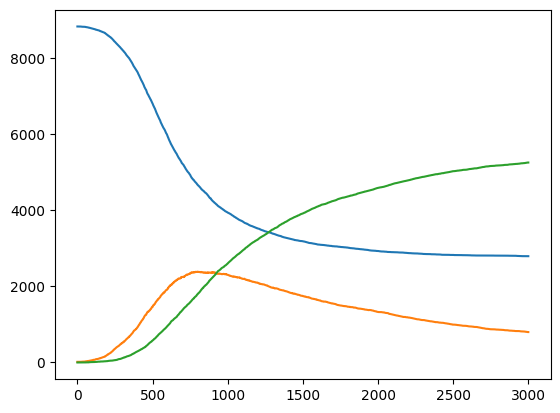

In [7]:
# 观测数据呈现
import matplotlib.pyplot as plt
plt.plot(trends[0]['trends']['node_count'][0])
plt.plot(trends[0]['trends']['node_count'][1])
plt.plot(trends[0]['trends']['node_count'][2])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
# from EnKF_random import EnsembleKalmanFilter
# from EnKF_multirun import EnsembleKalmanFilter
# 主代码 改成我自己风格的代码
from imp import reload
import(EnKF_both)
reload(EnKF_both)
from EnKF_both import EnKFBoth
from EnKF_delta import EnKFBeta
from EnKF_delta_gamma import EnKFGamma
from utils import save_obj, load_obj, hx2, reverse_map, map
from tqdm.notebook import tqdm as tqdm
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
# from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import os
# from generate_data import gene_obserbation
from EnKF import EnKFBeta, EnKFGamma, EnKFBoth
from utils import save_obj, load_obj, hx2
from tqdm.notebook import tqdm as tqdm
# from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import os
# from generate_data import gene_obserbation
from numpy.random import multivariate_normal

def generate_modes(N, graph, seed, Is, params, mode, beta_gt, gamma_gt):
    # 生成预测模型
    # params 里面有初始值
    # 这里取消了随机种子的设定
    n_nodes = nx.number_of_nodes(graph)
    sirmodels = []
    if mode == 'beta':
        betas = params #生成的模型的均值是真实值
        gammas = gamma_gt * np.ones(N)  # _gt代表真实值
    elif mode == 'gamma':  # 估计gamma
        betas = beta_gt * np.ones(N)
        gammas = params
    else:
        betas = params[0].reshape(-1)
        gammas = params[1].reshape(-1)
    for i in range(N):  # N是节点数目
        model = HyperSIRModel(graph)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', np.random.exponential(betas[i], int(n_nodes)))
        cfg.add_model_parameter('gamma', np.random.exponential(gammas[i], int(n_nodes)))
        cfg.add_model_parameter("fraction_infected", Is[i]) # 用模拟值做初始感染率
        model.set_initial_status(cfg)
        sirmodels.append(model)
    return sirmodels


def get_initial_state(models):
    # 对每个样本计算当前的感染率和转化率
    Is = []
    Rs = []
    for model in models:
        i = 0
        r = 0
        cnt = 0
        for key, val in model.initial_status.items():
            if val == 1:  #如果是在感染状态
                i += 1
            elif val == 2:  #如果是在恢复状态
                r += 1
            cnt += 1
        Is.append(i/cnt)  # 平均感染率
        Rs.append(r/cnt)  # 平均回复率
    return Is, Rs

def run(gt_param, beta, gamma, task, Q_x, Q_param, P_x, P_param, R_x, N, windows, rounds, measurement_mode='infection'):
    # 把生成观测和预测放在一起
    assert measurement_mode in ['infection', 'both'] # [仅观测感染率，观测感染率和移除率]
    gt_graph = gt_param['graph']
    gt_beta = gt_param['beta_gt']
    gt_gamma = gt_param['gamma_gt']
    gts = gt_param['gts']
    n_nodes = gt_param['n_nodes']
    if task in ['beta', 'gamma']:
        if task == 'beta':
            x_mean = np.array([10/n_nodes, 0/n_nodes, beta]) # infected, removed, beta
        else:
            x_mean = np.array([10/n_nodes, 0/n_nodes, gamma]) # 这里的beta不是beta_gt 是随机的
        Q = np.diag([Q_x**2, Q_x**2, Q_param**2])
        P = np.diag([P_x**2, P_x**2, P_param**2])
    else:
        x_mean = np.array([10/n_nodes, 0/n_nodes, beta, gamma])
        Q = np.diag([Q_x**2, Q_x**2, Q_param**2, Q_param**2])   #Q是系统误差协方差
        P = np.diag([P_x**2, P_x**2, P_param**2, P_param**2])   # P是中间变量 是进入系统进化后的误差
    if measurement_mode == 'both':
        R = np.diag([R_x**2, R_x**2])  # R是观测误差协方差
    else:
        R = np.diag([R_x**2])
    states_init = multivariate_normal(mean=x_mean, cov=P, size=N)  #size为样本大小  shape(N,3)
    Is = np.clip(states_init[:, 0].reshape(-1), 0.001, 0.003)  # 限制下初始感染率  reshape(-1)改成一串 没有行列 限制在0.001 到0.003之间
    if task == 'beta':
        params = np.clip(states_init[:, -1].reshape(-1), 0.0001, 0.5) # 最后一个参数是beta 对它做处理
    elif task == 'gamma':
        params = np.clip(states_init[:, -1].reshape(-1), 0.0001, 0.5) # 只同化一个参数
    else:
        params1 = np.clip(states_init[:, -2].reshape(-1), 0.0001, 0.5) # 同时同化两个参数
        params2 = np.clip(states_init[:, -1].reshape(-1), 0.0001, 0.5) # 同时同化两个参数
        params = [params1, params2]
    # 模型要求初始移除率为0
    sirmodels = generate_modes(N, gt_graph, 0, Is, params, task, gt_beta, gt_gamma)

    dim_z = R.shape[0]  # 需要估计的参数数量
    current_Is, current_Rs = get_initial_state(sirmodels)  # 每个样本的平均感染率
    if task in ['beta', 'gamma']:
        x = np.array([current_Is, current_Rs, [map(l) for l in states_init[:, -1].reshape(-1).tolist()]]).T
        if task == 'beta':
            enkf = EnKFBeta(x, P, dim_z, N, hx, sirmodels, n_nodes, task=task) # x代表初始状态  hx返回numpy形式的第一个值
        else:
            enkf = EnKFGamma(x, P, dim_z, N, hx, sirmodels, n_nodes, task=task) # hx是函数，返回更新后的观测值
    else:
        current_betas = [map(l) for l in states_init[:, -2].reshape(-1).tolist()]  # 把值映到R上
        current_gammas = [map(l) for l in states_init[:, -1].reshape(-1).tolist()]
        x = np.array([current_Is, current_Rs, current_betas, current_gammas]).T # x的每个元素的长度是样本量
        if measurement_mode == 'both':
            enkf = EnKFBoth(x, P, dim_z, N, hx2, sirmodels, n_nodes, task=task)
        else:
            raise NotImplementedError
    post_states = list()
    prior_states = list()
    save_path = 'beta{}_gamma{}_mea{}_Qx{}_Qp{}_Px_{}_Pp{}_Rx{}_N{}_L{}'.format(
                        beta, gamma, measurement_mode, Q_x, Q_param, P_x, P_param, R_x, N, windows)
    save_dir = gt_param['save_dir']+task
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    full_path = os.path.join(save_dir, save_path)
    print('save to:---> ', full_path)
    with tqdm(range(rounds), desc='Test') as tbar:
        for i in tbar:
            if measurement_mode == 'both':
                measurement = np.array([gts[0]['trends']['node_count'][j][i] / n_nodes for j in range(1, 3)])
            else:
                measurement = np.array([gts[0]['trends']['node_count'][1][i] / n_nodes]) # 感染率
            if task == 'all':
                # 如果同时估计两个参数，则开启自适应噪声
                Q[0][0] = max(min((measurement[0] * 3e-2)**2, 3e-3**2), 5e-6**2)
                Q[1][1] = max(min((measurement[-1] * 3e-2)**2, 3e-3**2), 5e-6**2)
                R[0][0] = max(min((measurement[0] * 4e-2)**2, 6e-3**2), 5e-6**2)
                enkf.predict(Q, windows=windows)
            else:
                if i % 250 == 0:
                    Q[-1][-1] /= (5.0**2)
                    R[-1] /= (5.0**2)
                enkf.predict(Q, windows=windows)
            enkf.update(measurement, R)
            post_states.append(enkf.x)
            prior_states.append(enkf.x_prior)
            # if i % 50 == 0:
            #     np.save(full_path, post_states) # 保存EnKF修正后结果  #如果文件路径末尾没有扩展名.npy，该扩展名会被自动加上。
            #     np.save(full_path+'_before', prior_states) # 保存预测结果
            if task == 'beta':
                tbar.set_postfix(param = reverse_map(post_states[-1][-1]))
                # print('param: ', reverse_map(post_states[-1][-1]))
            elif task == 'gamma':
                tbar.set_postfix(gama_param = reverse_map(post_states[-1][-1]))
                # print('gamma param: ', reverse_map(post_states[-1][-1]))
            else:
                tbar.set_postfix(param = reverse_map(post_states[-1][-2]), gama_param = reverse_map(post_states[-1][-1]))
                # print('beta estimate={}, gamma estimate={}'.format(reverse_map(post_states[-1][-2]), reverse_map(post_states[-1][-1])))
    np.save(full_path, post_states)
    np.save(full_path+'_before', prior_states)
    # 要保存每次估计的参数， 已经保存过了
    ## 应该加上生成图片的模块





SyntaxError: invalid syntax (3953026951.py, line 5)

In [24]:
import sys
# output_file = "./data/res_0924/outer.txt"
# with open(output_file, 'w') as f:

gt_param = {'graph': g, 'beta_gt':0.001, 'gamma_gt':0.004, 'gts': trends, 'n_nodes':8846, 'save_dir':'./scen2_data/res/'}
run(gt_param = gt_param, beta=0.01, gamma=0.01, task='all', Q_x=1e-3, Q_param=1e-4, P_x=2.5e-3, P_param=2e-3, R_x=5e-3, N=50, windows=20, rounds = 3000, measurement_mode='both')
# sys.stdout.close()

KeyError: 5244

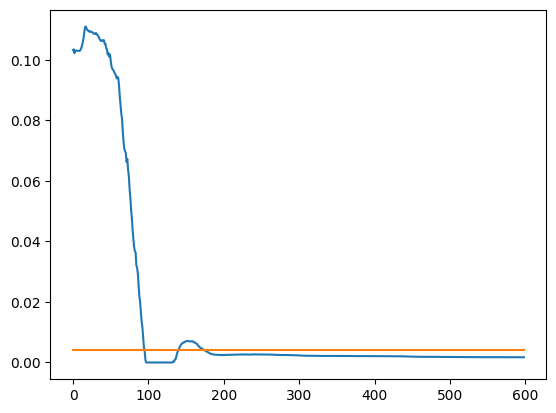

In [16]:
import numpy as np
# from utils import load_obj, hx, save_obj, map, reverse_map, hx2
c = np.load(r'C:\Users\xinji\Documents\理论论文\卡尔曼滤波\my_code\HDA\data\res_0924\all\beta0.005_gamma0.1_meaboth_Qx0.001_Qp0.0001_Px_0.0025_Pp0.002_Rx0.005_N50_L20.npy')
plt.plot([reverse_map(i) for i in c[:,-1]])
plt.plot([0.004 for i in c[:,-2]])

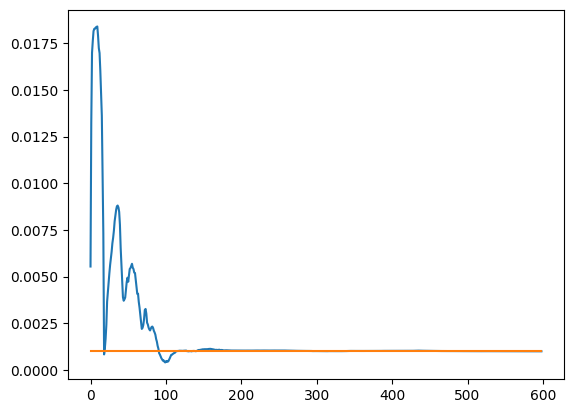

In [15]:
plt.plot([reverse_map(i) for i in c[:,-2]])
plt.plot([0.001 for i in c[:,-2]])

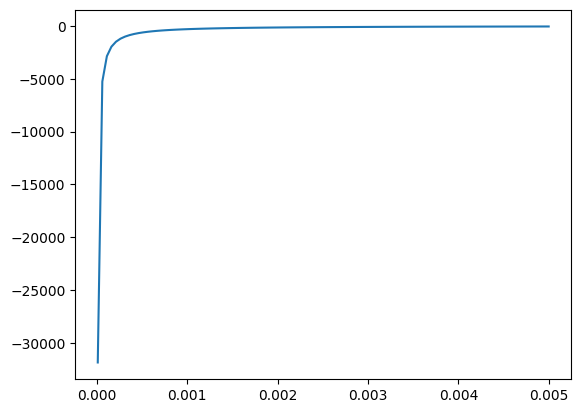

In [24]:
import math
a = np.linspace(0.00001,0.005,100)
b = [math.tan((x-1/2)*math.pi) for x in a]
plt.plot(a,b)


In [14]:
import networkx as nx
import powerlaw    # 导入powerlaw库
import matplotlib.pyplot as plt

# 生成一个无标度网络作为示例
G = nx.barabasi_albert_graph(1000, 3)

# 获取网络中所有节点的度
degrees = [G.degree(n) for n in G.nodes()]

# 使用powerlaw库来拟合度分布
fit = powerlaw.Fit(degrees)

# 打印拟合结果
print('Power-law exponent = ', fit.alpha)
print('xmin = ', fit.xmin)
print('拟合结果 = ', fit.power_law.truncation_power_law_parameters)

# 绘制度分布的直方图
fit.plot_pdf(color='b', label='数据的直方图')
plt.loglog()
plt.xlabel('度')
plt.ylabel('概率')
plt.title('度分布')

# 绘制拟合的幂律分布曲线
x = powerlaw.arange(1, max(degrees)+1, step=1)
plt.loglog(x, powerlaw.pdf(x, *fit.power_law.truncation_power_law_parameters), color='r', label='拟合的幂律分布')

# 显示图例
plt.legend()
plt.show()

# 检查拟合结果是否显著
if fit.likelihood_ratio_test('power_law'):
    print('该分布服从幂律分布')
else:
    print('该分布不服从幂律分布')

Calculating best minimal value for power law fit
Power-law exponent =  3.0570649398061978
xmin =  5.0


AttributeError: 'Power_Law' object has no attribute 'truncation_power_law_parameters'

Power-law exponent =  1.195989606580611
xmin =  1.0


AttributeError: module 'powerlaw' has no attribute 'pareto'

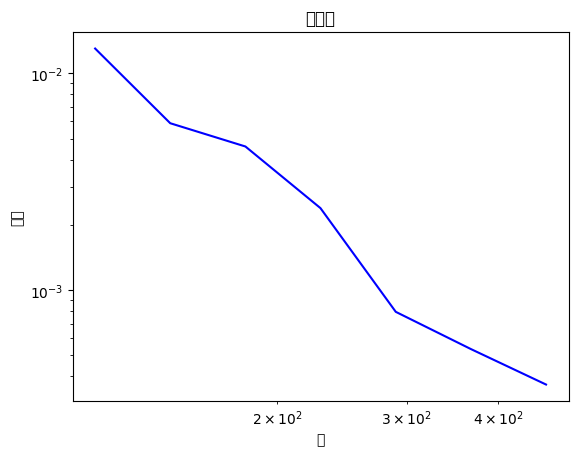

In [17]:
import networkx as nx
import powerlaw
import matplotlib.pyplot as plt

# 生成一个无标度网络作为示例
G = nx.barabasi_albert_graph(1000, 100)

# 获取网络中所有节点的度
degrees = [G.degree(n) for n in G.nodes()]

# 使用powerlaw库来拟合度分布
pl = powerlaw.Fit(degrees, xmin=1)

# 打印拟合结果
print('Power-law exponent = ', pl.alpha)
print('xmin = ', pl.xmin)

# 绘制度分布的直方图
pl.plot_pdf(color='b', label='数据的直方图', ax=plt.gca())
plt.loglog()
plt.xlabel('度')
plt.ylabel('概率')
plt.title('度分布')

# 绘制拟合的幂律分布曲线
x = powerlaw.pareto.rvs(pl.alpha, size=len(degrees), loc=1, scale=1)
plt.plot(x, powerlaw.pdf(x, pl.alpha, loc=1, scale=1), color='r', label='拟合的幂律分布')

# 显示图例
plt.legend()
plt.show()

# 检查拟合结果是否显著
if pl.distribution_compare('power_law', 'lognormal'):
    print('该分布服从幂律分布')
else:
    print('该分布不服从幂律分布')

In [ ]:
import ndlib.models.epidemics as ep
# from myDiffusion import DynamicDiffusionModel
import numpy as np
import networkx as nx
import future.utils


class HyperSIRModel(ep.SIRModel):
    """
       Model Parameters to be specified via ModelConfig

       :param beta: The infection rate (float value in [0,1])
       :param gamma: The recovery rate (float value in [0,1])
    """
    def a(self):
        return 0

    # def iteration(self, node_status=True):
    #     """
    #     Execute a single model iteration

    #     :return: Iteration_id, Incremental node status (dictionary node->status)
    #     """
    #     self.clean_initial_status(list(self.available_statuses.values()))

    #     actual_status = {node: nstatus for node, nstatus in future.utils.iteritems(self.status)}
    #     self.active = [node for node, nstatus in future.utils.iteritems(self.status) if nstatus != self.available_statuses['Susceptible']]

    #     if self.actual_iteration == 0:
    #         self.actual_iteration += 1
    #         delta, node_count, status_delta = self.status_delta(actual_status)
    #         if node_status:
    #             return {"iteration": 0, "status": actual_status.copy(),
    #                     "node_count": node_count.copy(), "status_delta": status_delta.copy()}
    #         else:
    #             return {"iteration": 0, "status": {},
    #                     "node_count": node_count.copy(), "status_delta": status_delta.copy()}

    #     for u in self.active:

    #         u_status = self.status[u]
                        
    #         if u_status == 1:

    #             if self.graph.directed:
    #                 susceptible_neighbors = [v for v in self.graph.successors(u) if self.status[v] == 0]
    #             else:
    #                 susceptible_neighbors = [v for v in self.graph.neighbors(u) if self.status[v] == 0]
    #             for v in susceptible_neighbors:
    #                 eventp = np.random.random_sample()
    #                 if eventp < self.params['model']['beta'][u]:
    #                     actual_status[v] = 1

    #             eventp = np.random.random_sample()
    #             if eventp < self.params['model']['gamma'][u]:
    #                 actual_status[u] = 2

    #     delta, node_count, status_delta = self.status_delta(actual_status)
    #     self.status = actual_status
    #     self.actual_iteration += 1

    #     if node_status:
    #         return {"iteration": self.actual_iteration - 1, "status": delta.copy(),
    #                 "node_count": node_count.copy(), "status_delta": status_delta.copy()}
    #     else:
    #         return {"iteration": self.actual_iteration - 1, "status": {},
    #                 "node_count": node_count.copy(), "status_delta": status_delta.copy()}


In [ ]:
a = HyperSIRModel(graph)

In [ ]:
import networkx as nx
data1 = r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\my_code\data\networks\p2p-Gnutella05.txt"
def read_txt_direct(data):
    g = nx.read_edgelist(data, create_using=nx.DiGraph())
    return g
graph = read_txt_direct(data1)


In [ ]:
nx.number_of_nodes(graph)

In [ ]:
a = sorted(map(int,list(graph.nodes())))
adj_matrix_sparse = nx.adjacency_matrix(graph)

In [ ]:
graph_b = nx.from_numpy_array(adj_matrix_sparse)

In [ ]:
len(graph_b.nodes())